# Structure of semicrystalline polymer (R-BAPB) 

In [1]:
import h5py
import numpy as np
import scipy as scipy
from scipy import optimize
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker
import time
import peakutils
%matplotlib inline

## Azimutal integration

In [49]:
# Loading file with already 'caked' scans
file_name = "H://LP/R-BAPB/print1434.h5"
file_num = '1434' # experiment id
data_inner_directory = "data/data" # path to data inside the archive
file = h5py.File(file_name, "r") # reading mode
all_scans = file[data_inner_directory] 
q_set = np.copy(file["data/q"]) # actual values for q and chi
chi_set = np.copy(file["data/chi"])
map_width = int(all_scans.shape[0]**0.5) 

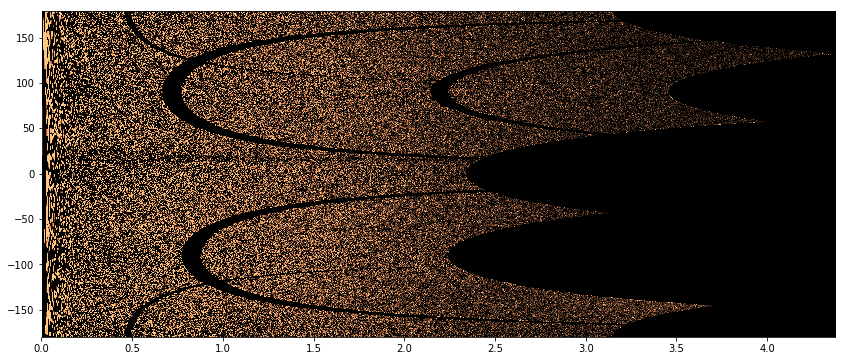

In [31]:
# Check up
fig = plt.figure(figsize=(15,6))
plt.imshow(all_scans[-100], 
           cmap = 'copper', 
           clim = (0,0.3), 
           extent=[q_set[0],q_set[-1],chi_set[0],chi_set[-1]], 
           interpolation = 'nearest',
           aspect = 0.005)

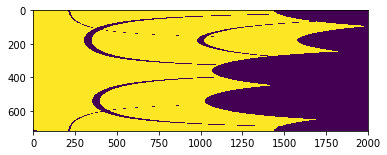

In [34]:
# Excluding gaps and beamstop
scan = all_scans[1]
mask = scan>=0
plt.imshow(mask)

In [35]:
np.save(file_num+'azim_mask', mask)

In [36]:
# Counting how many valid (q,chi) points there are for each point of profile
counts = np.zeros(all_scans.shape[2], dtype=np.float32)
for chi in range(all_scans.shape[1]):
    if chi not in range(300,330):
            for q in range(all_scans.shape[2]):
                if mask[chi,q]:
                    counts[q]+=1

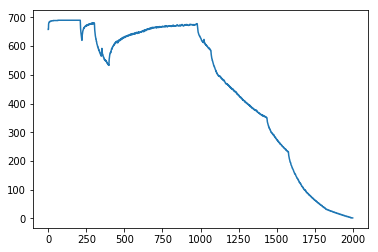

In [37]:
plt.plot(counts)

In [38]:
np.save(file_num+'azim_counts', counts)

In [39]:
# Creating a file to write integrated profiles in
new_file = h5py.File(file_num + "profiles.hdf5", "w")
dset = new_file.create_dataset("data", (all_scans.shape[0], all_scans.shape[2]), dtype= np.float32)

In [45]:
start_time = time.time() #time counter
counts = np.load(file_num+'azim_counts.npy')
mask = np.load(file_num+'azim_mask.npy')
for i in range(all_scans.shape[0]):
    profile = np.zeros(all_scans.shape[2], dtype=np.float32)
    current_scan = all_scans[i]*mask
    for chi in range(all_scans.shape[1]):
         if chi not in range(300,330):
                profile+=current_scan[chi]
    profile/=counts
    dset[i]=profile
    
    print(i," % seconds" % (time.time() - start_time)) # time display

        

0  0.2960233688354492econds
1  0.4464449882507324econds
2  0.686450719833374econds
3  0.8998637199401855econds
4  0.9848096370697021econds
5  1.1786916255950928econds
6  1.272632360458374econds
7  1.3365941047668457econds
8  1.48150634765625econds
9  1.586442232131958econds
10  1.6633930206298828econds
11  1.8482799530029297econds
12  1.980114221572876econds
13  2.063060998916626econds
14  2.1490087509155273econds
15  2.325899600982666econds
16  2.419843912124634econds
17  2.497793197631836econds
18  2.63870906829834econds
19  2.718658447265625econds
20  2.8375840187072754econds
21  2.91953706741333econds
22  3.055452823638916econds
23  3.1473937034606934econds
24  3.262324810028076econds
25  3.3362770080566406econds
26  3.533156633377075econds
27  3.6670751571655273econds
28  3.7909975051879883econds
29  4.200745105743408econds
30  4.347654581069946econds
31  4.436600923538208econds
32  4.554527759552002econds
33  4.73641562461853econds
34  4.889322996139526econds
35  4.97826623916626

284  42.171833992004395econds
285  42.284069299697876econds
286  42.50893020629883econds
287  42.75006723403931econds
288  42.84600496292114econds
289  42.95394015312195econds
290  43.13982605934143econds
291  43.28173804283142econds
292  43.41265797615051econds
293  43.48461174964905econds
294  43.66050410270691econds
295  43.90856075286865econds
296  43.99577355384827econds
297  44.14219546318054econds
298  44.28610587120056econds
299  44.367063760757446econds
300  44.4949836730957econds
301  44.62969708442688econds
302  44.72563934326172econds
303  44.869550466537476econds
304  44.9495005607605econds
305  45.06143522262573econds
306  45.14238119125366econds
307  45.27929663658142econds
308  45.36924123764038econds
309  45.48517036437988econds
310  45.61409044265747econds
311  45.81296706199646econds
312  45.943889141082764econds
313  46.03083324432373econds
314  46.16375207901001econds
315  46.31688046455383econds
316  46.46679091453552econds
317  46.543251514434814econds
318  46.75

569  85.63346242904663econds
570  85.73006939888econds
571  85.98679804801941econds
572  86.1936731338501econds
573  86.32658815383911econds
574  86.46650123596191econds
575  86.61009573936462econds
576  86.75000977516174econds
577  86.93789291381836econds
578  87.17501711845398econds
579  87.32113480567932econds
580  87.65101051330566econds
581  87.81190872192383econds
582  87.8890552520752econds
583  88.09603500366211econds
584  88.22295641899109econds
585  88.35464525222778econds
586  88.5350501537323econds
587  88.66106247901917econds
588  88.7969765663147econds
589  88.99997544288635econds
590  89.13484215736389econds
591  89.23378443717957econds
592  89.31772994995117econds
593  89.54461312294006econds
594  89.66506004333496econds
595  89.85296273231506econds
596  89.93590903282166econds
597  90.13080883026123econds
598  90.32573366165161econds
599  90.41843485832214econds
600  90.61700963973999econds
601  90.82301807403564econds
602  90.91296172142029econds
603  91.0508754253387

850  127.79209017753601econds
851  128.0719211101532econds
852  128.19684290885925econds
853  128.46167659759521econds
854  128.68953824043274econds
855  128.95138025283813econds
856  129.26689314842224econds
857  129.5068440437317econds
858  129.82264852523804econds
859  129.96655941009521econds
860  130.11546778678894econds
861  130.36431407928467econds
862  130.44926118850708econds
863  130.59017634391785econds
864  130.83404445648193econds
865  131.17583203315735econds
866  131.27577424049377econds
867  131.42168378829956econds
868  131.53261351585388econds
869  131.66053533554077econds
870  131.82843232154846econds
871  131.9323673248291econds
872  132.1432375907898econds
873  132.32264256477356econds
874  132.40959000587463econds
875  132.54850459098816econds
876  132.66043162345886econds
877  132.81633877754211econds
878  132.89928603172302econds
879  133.04519772529602econds
880  133.14734530448914econds
881  133.3086199760437econds
882  133.43258380889893econds
883  133.638457

1123  175.59763431549072econds
1124  175.68258500099182econds
1125  175.8135027885437econds
1126  175.98839497566223econds
1127  176.1083207130432econds
1128  176.20626068115234econds
1129  176.42112946510315econds
1130  176.5740351676941econds
1131  176.68796467781067econds
1132  176.81788396835327econds
1133  176.8748495578766econds
1134  176.9867820739746econds
1135  177.09073114395142econds
1136  177.8730170726776econds
1137  178.1024878025055econds
1138  178.19707703590393econds
1139  178.4089457988739econds
1140  178.61203336715698econds
1141  178.81017327308655econds
1142  179.08704209327698econds
1143  179.2629325389862econds
1144  179.429829120636econds
1145  179.5427577495575econds
1146  179.64069867134094econds
1147  179.81558656692505econds
1148  180.0064685344696econds
1149  180.1344437599182econds
1150  180.36912989616394econds
1151  180.4670693874359econds
1152  180.619975566864econds
1153  180.6979296207428econds
1154  180.80886125564575econds
1155  180.93278431892395ec

1392  214.25118613243103econds
1393  214.33813285827637econds
1394  214.4870412349701econds
1395  214.6099648475647econds
1396  214.7568747997284econds
1397  214.8658082485199econds
1398  215.0267071723938econds
1399  215.17661499977112econds
1400  215.35150957107544econds
1401  215.429461479187econds
1402  215.5583803653717econds
1403  215.69529700279236econds
1404  215.86319231987econds
1405  215.94814014434814econds
1406  216.08805632591248econds
1407  216.2229700088501econds
1408  216.3858711719513econds
1409  216.46382308006287econds
1410  216.63871502876282econds
1411  216.73965454101562econds
1412  216.8485848903656econds
1413  217.09126138687134econds
1414  217.23217248916626econds
1415  217.36210107803345econds
1416  217.4600489139557econds
1417  217.54599857330322econds
1418  217.73687887191772econds
1419  217.86080384254456econds
1420  218.0456886291504econds
1421  218.2977454662323econds
1422  218.6470696926117econds
1423  218.93700551986694econds
1424  219.0669243335724eco

1662  254.38628768920898econds
1663  254.60817050933838econds
1664  254.71610188484192econds
1665  254.82603645324707econds
1666  254.95095801353455econds
1667  255.06288814544678econds
1668  255.15483283996582econds
1669  255.26776361465454econds
1670  255.42966437339783econds
1671  255.595561504364econds
1672  255.67251443862915econds
1673  255.77544975280762econds
1674  255.87989807128906econds
1675  255.98982882499695econds
1676  256.08277320861816econds
1677  256.19770097732544econds
1678  256.31363010406494econds
1679  256.44998121261597econds
1680  256.5594289302826econds
1681  256.6593642234802econds
1682  256.8125972747803econds
1683  256.9655034542084econds
1684  257.0754373073578econds
1685  257.23056149482727econds
1686  257.3764762878418econds
1687  257.5193884372711econds
1688  257.5993399620056econds
1689  257.6922821998596econds
1690  257.81021094322205econds
1691  258.0150845050812econds
1692  258.10307145118713econds
1693  258.205007314682econds
1694  258.365194320678

1934  289.8107280731201econds
1935  289.90367007255554econds
1936  290.02059841156006econds
1937  290.12753224372864econds
1938  290.24945759773254econds
1939  290.4133894443512econds
1940  290.7104425430298econds
1941  290.8323698043823econds
1942  290.9053225517273econds
1943  291.0232527256012econds
1944  291.1431767940521econds
1945  291.26910042762756econds
1946  291.34105682373047econds
1947  291.5480251312256econds
1948  291.84008264541626econds
1949  291.9130382537842econds
1950  292.03896164894104econds
1951  292.2198495864868econds
1952  292.2988004684448econds
1953  292.4157295227051econds
1954  292.5576424598694econds
1955  292.6385910511017econds
1956  292.8084855079651econds
1957  292.91742157936096econds
1958  293.0243546962738econds
1959  293.11129999160767econds
1960  293.2282292842865econds
1961  293.360148191452econds
1962  293.45708751678467econds
1963  293.5360743999481econds
1964  293.6719899177551econds
1965  293.7699282169342econds
1966  293.87586307525635econds

2206  326.3480052947998econds
2207  326.6350305080414econds
2208  326.74496269226074econds
2209  326.8728837966919econds
2210  326.97883129119873econds
2211  327.15975880622864econds
2212  327.3870565891266econds
2213  327.52404832839966econds
2214  327.66982531547546econds
2215  327.9785385131836econds
2216  328.345210313797econds
2217  328.463139295578econds
2218  328.6370630264282econds
2219  328.8220648765564econds
2220  328.94399189949036econds
2221  329.1678521633148econds
2222  329.30360221862793econds
2223  329.49807381629944econds
2224  329.7580680847168econds
2225  330.07183384895325econds
2226  330.14778876304626econds
2227  330.3037085533142econds
2228  330.526570558548econds
2229  330.62850856781006econds
2230  330.8143937587738econds
2231  330.98328971862793econds
2232  331.1941590309143econds
2233  331.4100275039673econds
2234  331.5669298171997econds
2235  331.70593547821045econds
2236  331.9000840187073econds
2237  331.98603224754333econds
2238  332.0529901981354econds

2480  363.60894751548767econds
2481  363.679904460907econds
2482  363.8118226528168econds
2483  363.91775941848755econds
2484  364.05567359924316econds
2485  364.12762928009033econds
2486  364.2465572357178econds
2487  364.3374991416931econds
2488  364.4980278015137econds
2489  364.5888571739197econds
2490  364.75375628471375econds
2491  364.88067984580994econds
2492  364.95663046836853econds
2493  365.0645670890808econds
2494  365.15650725364685econds
2495  365.27428007125854econds
2496  365.3590748310089econds
2497  365.5629508495331econds
2498  365.69087076187134econds
2499  365.7658236026764econds
2500  365.8637640476227econds
2501  365.9886898994446econds
2502  366.12561774253845econds
2503  366.2035701274872econds
2504  366.3858497142792econds
2505  366.5107731819153econds
2506  366.6626796722412econds
2507  366.73463678359985econds
2508  366.8605601787567econds
2509  367.0036256313324econds
2510  367.2834656238556econds
2511  367.3574161529541econds
2512  367.51632142066956econd

In [50]:
new_file.close()
file.close()

In [63]:
#Check is everything went fine
file = h5py.File(file_num+"profiles.hdf5", "r")
data = file['data']

Text(0.5, 0, 'q, 1/Å')

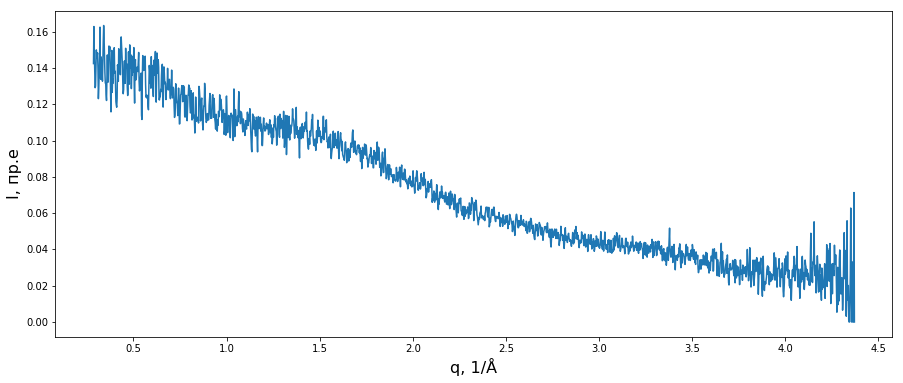

In [64]:
#Displaying profiles

profile = data[1000]
fig = plt.figure(figsize=(15,6))
plt.plot(q_set[130:],profile[130:])
plt.ylabel("I, пр.е", fontsize = 16)
plt.xlabel("q, 1/\u212B", fontsize = 16)
#plt.savefig(file_num+'profile.pdf')

In [65]:
file.close()

In [ ]:
#Initial global parameters
map_width = 1 #default value
min_ROI_q = 570 # region of interest for q, data point indices
max_ROI_q = 650
min_ROI_chi = 0 # region of interest for angle chi, data point indices
max_ROI_chi = 720 

## Mapping

In [ ]:
all_scans.shape

In [ ]:
q_set = file["data/q"]
q_set = np.asarray(q_set)

In [ ]:
q_set = 360*np.arcsin(q_set*0.8349/(4*np.pi))/np.pi

In [ ]:
file.close()

In [ ]:
dset = file['data']

In [ ]:
list(dset.keys())

In [ ]:
np.save('q_set',q_set)
np.save('chi_set', chi_set)
np.save('test_scan', all_scans[600])

In [ ]:
q_set[230]

In [ ]:
scan = all_scans[14640]
fig, ax = plt.subplots(figsize=(6,6))
plt.ylabel("Угол \u03C7, град.")
plt.xlabel("q, 1/\u212B")
ax.imshow(scan[:360,450:850], cmap='copper', interpolation='none', extent=[q_set[450],q_set[850],chi_set[0],chi_set[360]], clim = (0,1.5), aspect = 0.005)
#plt.savefig('azim-amo.pdf')11

In [ ]:
plt.hist(scan[1], bins = 300)
plt.show()

In [ ]:
scan = np.load('scan_sum1434.npy')

In [ ]:
for row in scan:
    row[row<0]= np.nan
    
print (scan[10])

In [ ]:
360/np.pi*np.arcsin(0.08/np.pi)

In [ ]:
profile = scan[100]+scan[101]+scan[102]
    
plt.plot(q_set,profile)

In [ ]:

min_ROI_q = 230 # region of interest for q, data point indices
max_ROI_q = 1375

profile_sum = np.zeros(all_scans.shape[2], dtype=np.float32)
        
j_counter = 0
for j in range (min_ROI_chi,max_ROI_chi):
    profile = np.nan_to_num(scan[j])           
    profile_sum += profile
    j_counter+=1
#profile_sum/=j_counter


x = q_set[min_ROI_q:max_ROI_q]
y = profile_sum[min_ROI_q:max_ROI_q]

plt.figure(figsize=(10,6))
plt.plot(x,y)
profile_sum

In [ ]:
#local normalisation
local_mu = np.nanmean(profile_sum[min_ROI_q-100:max_ROI_q+100])
local_sigma = np.nanstd(profile_sum[min_ROI_q-100:max_ROI_q+100])

local_profile = profile_sum[min_ROI_q-100:max_ROI_q+100]

for cell in local_profile:
    cell = (cell - local_mu)/local_sigma

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(q_set[min_ROI_q:max_ROI_q],local_profile[100:-100])


In [ ]:
local_profile[100:-100] == profile_sum[min_ROI_q:max_ROI_q]

In [ ]:
### without normalization
new_scan = all_scans[1000]
#for i in range(100):
 #   new_scan+=all_scans[i]


min_ROI_q =  570 # region of interest for q, data point indices
max_ROI_q = 650

new_profile_sum = np.zeros(all_scans.shape[2], dtype=np.float32)
        
j_counter = 0
for j in range (min_ROI_chi,max_ROI_chi):
    if j not in range(330,360): #exclude beamstop
        profile = new_scan[j]    
        if (-10 not  in profile[min_ROI_q:max_ROI_q]):
            new_profile_sum += profile
            j_counter+=1
#new_profile_sum/=j_counter


x = q_set[min_ROI_q:max_ROI_q]
y = new_profile_sum[min_ROI_q:max_ROI_q]

plt.figure(figsize=(11,6))
plt.ylabel("I, пр.е")
plt.xlabel("q, 1/\u212B")
plt.plot(x,y, 'bo')

j_counter
#plt.savefig("waxs_profile.pdf")

In [ ]:
new_profile_sum-=550

In [ ]:
x = q_set[min_ROI_q:max_ROI_q]
y = new_profile_sum[min_ROI_q:max_ROI_q]

plt.figure(figsize=(11,6))
plt.ylabel("I, пр.е")
plt.xlabel("q, 1/\u212B")
plt.plot(x,y, 'bo')

In [ ]:
np.save('profile_gauss1', new_profile_sum[min_ROI_q:max_ROI_q])
np.save('q_gauss1', q_set[min_ROI_q:max_ROI_q])

In [ ]:
np.save('profile', new_profile_sum[min_ROI_q:max_ROI_q])

In [ ]:
#Mapping by simply integrating in ROI_q


#baseline = np.load('1434profile.npy')
start_time = time.time() #time counter
stn_map_data = np.zeros((map_width,map_width), dtype=np.float32) 

for i in range(map_width**2):
        current_scan = all_scans[i]   
        profile_sum = np.zeros(all_scans.shape[2], dtype=np.float32)
        
        j_counter = 0
        for j in range (min_ROI_chi,max_ROI_chi):
            profile = current_scan[j]           
            if (-10 not in profile[min_ROI_q-70:max_ROI_q+70]):
                profile_sum += profile
                j_counter+=1
        profile_sum/=j_counter
        
        
        y_wide = scipy.signal.savgol_filter(profile_sum[min_ROI_q-70:max_ROI_q+70], window_length= 25, polyorder= 3, deriv=0, delta=0.1, axis=-1, mode='interp', cval=0.0)
        #base = peakutils.baseline(profile_sum[min_ROI_q-70:max_ROI_q+70], deg=5)
        #y_wide= profile_sum[min_ROI_q-70:max_ROI_q+70]-base
        

        x_set = q_set[min_ROI_q:max_ROI_q]
        y_set = y_wide[70:-70]

        #popt, pcov = scipy.optimize.curve_fit(gaussian, x, y, p0=[1.3,0.05,0.5,0.1], method = 'dogbox')
        I = scipy.integrate.trapz(x = x_set, y = y_set)
        print(I)
        
        
        x = int(i%map_width)
        y = int(i//map_width)
        
        stn_map_data[y, x]=I
        print(i,"--- %s seconds ---" % (time.time() - start_time))

#saving map data

np.save(file_num + 'trapz_map_data', stn_map_data)

In [ ]:
#Summing all  scans of the experiment


scan_sum = np.zeros((all_scans.shape[1],all_scans.shape[2]), dtype = np.float32)
start_time = time.time()
for scan in all_scans:
    scan_sum+=scan
    print("--- %s seconds ---" % (time.time() - start_time))
    
scan_sum/=all_scans.shape[0] #normalizing

#saving

np.save('scan_sum' + file_num, scan_sum)

In [ ]:
#Assembling a normilized profile from different parts of a scan (because yeah I don't have mask files)

#scan_sum = np.load('scan_sum' + file_num + '.npy', )

#TODO - зашкал при i=6 - почему???
#Сшивка между срезами - чем больше N, тем меньше разница

M = all_scans.shape[2] #number of points in profile
N=3 #number of slices
halo_profile = np.zeros(M, dtype=np.float32)
for i in range(N):  
    
    min_slice = int(M*i/N)
    max_slice = int(M*(i+1)/N)
    counter = 0 
    print(i, min_slice, max_slice)
    local_sum = np.zeros(M, dtype=np.float32)
    
    for j in range(min_ROI_chi, max_ROI_chi):
        profile = scan_sum[j]
        if not any(x<=0 for x in profile[min_slice:max_slice]):
            local_sum[min_slice:max_slice]+=profile[min_slice:max_slice]        
            counter +=1
                
    print(counter)
    halo_profile[min_slice:max_slice] += (local_sum[min_slice:max_slice]/counter) 


fig = plt.figure(figsize=(15,10))
plt.plot(q_set,halo_profile, label = 'halo profile')


#Setting scale 
ax = fig.add_subplot(2, 1, 1)
ax.loglog(q_set,halo_profile, label = 'loglog halo profile')

#ax.set_xscale('log')
#ax.set_yscale('log')
plt.legend()

#saving
np.save('halo_profile' + file_num, scan_sum)
np.savetxt('halo_profile' + file_num + '.txt', halo_profile)
np.savetxt('q_set' + file_num + '.txt', q_set)


In [ ]:
#Loading corrected halo profile
halo_baseline = np.loadtxt('halo_baseline' + file_num +'.txt')
print(halo_baseline)
#Integrating, saving

#1434 halo slice: 45-1998
halo_min = 1
halo_max = 2000

I =scipy.integrate.trapz(y = halo_baseline, x = q_set[halo_min-1:halo_max])
print (I)

halo_pars = [halo_min, halo_max, I]
np.savetxt('halo_params' + file_num + '.txt', halo_pars)


In [ ]:
#Mapping by simply integrating in ROI_q

#baseline = np.load('1434profile.npy')
start_time = time.time() #time counter
simple_map_data = np.zeros((map_width,map_width), dtype=np.float32) 

for i in range(map_width**2):
        current_scan = all_scans[i]   
        profile_sum = np.zeros(all_scans.shape[2], dtype=np.float32)
        
        j_counter = 0
        for j in range (min_ROI_chi,max_ROI_chi):
            profile = current_scan[j]           
            if (-10 not in profile[min_ROI_q-70:max_ROI_q+70]):
                profile_sum += profile
                j_counter+=1
        profile_sum/=j_counter
        
        base = peakutils.baseline(profile_sum[min_ROI_q-70:max_ROI_q+70], deg=5)
        profile_sum[min_ROI_q-70:max_ROI_q+70]-=base
        I =scipy.integrate.trapz(y = profile_sum[min_ROI_q:max_ROI_q], x = q_set[min_ROI_q:max_ROI_q])
        x = int(i%map_width)
        y = int(i//map_width)
        
        simple_map_data[y, x]=I
        print(i,"--- %s seconds ---" % (time.time() - start_time))

#saving map data

#np.save(file_num + 'simple_map_data', simple_map_data)

In [ ]:
plt.imshow(simple_map_data, cmap = "jet") #jet, magma, inferno, copper
plt.figure(figsize=(15,15))

plt.imsave(file_num +"map_q_{}-{}_chi_{}-{}-savitskiy_jet.png".format(min_ROI_q, max_ROI_q, min_ROI_chi, max_ROI_chi), \
          simple_map_data, cmap = "jet")


In [ ]:
print(simple_map_data)

In [ ]:
#Creating histogram
test_data = simple_map_data.flatten()
plt.hist(test_data, bins = 300)
plt.show()
#saving

In [ ]:
#Thresholding map data after looking at a histogram

masked_simple_map_data = np.zeros((map_width,map_width), dtype=np.float32) 
for i in range(map_width**2):
    x = int(i%map_width)
    y = int(i//map_width)
    if simple_map_data[x,y]>22:
        masked_simple_map_data[x,y] = simple_map_data[x,y] 
        
plt.imshow(masked_simple_map_data, cmap = "jet")
plt.figure(figsize=(15,15))

In [ ]:
#Creating mask

mask = np.load('1434mask_data.npy')
plt.imshow(mask, cmap = "jet") #jet, magma, inferno, copper
plt.figure(figsize=(15,15))
#mask = masked_simple_map_data > 0
#saving map data and mask

#plt.imsave(file_num +"map_q_{}-{}_chi_{}-{}-masked_jet.png".format(min_ROI_q, max_ROI_q, min_ROI_chi,\
 #                                                                  max_ROI_chi), masked_simple_map_data, cmap = "jet")
#np.save(file_num + "masked_map_data", masked_simple_map_data)
#np.save(file_num + "mask_data", mask)

In [ ]:
#Getting a normalized masked  profile of ROI_q
scan_count = 0
masked_scan_sum = np.zeros((all_scans.shape[1],all_scans.shape[2]), dtype = np.float32)
start_time = time.time()
for i in range(map_width**2):
    x = int(i%map_width)
    y = int(i//map_width)
    if not mask[y,x]:
        masked_scan_sum+=all_scans[i]
        scan_count +=1
        
    print(i,"--- %s seconds ---" % (time.time() - start_time))
    
masked_scan_sum/=scan_count #normalizing

#saving
np.save(file_num + 'negative_masked_scan_sum', masked_scan_sum)

In [ ]:
plt.imshow(map_data, cmap = "magma")
plt.figure(figsize=(15,15))